# Question 3

In this question we will
- Practice using the Canny edge detector to identify significant edges in images.



In [1]:
# boilerplate imports

import matplotlib.pyplot as plt
import skimage.data as skdata
import skimage.feature as skfeat
import skimage.color as skcolor
import skimage.io as skio

# Step 1: Perform Canny edge detection on the `skdata.astronaut()` image.

- call skimage.astronaut() to obtain the image
- convert it to grayscale
- perform Canny edge detection (`skfeat.canny()` function) on the grayscale image -- select the parameters to optimize the edge detection to find only the edges of major salient objects in the scene such as the person, helmet, flag, and space shuttle model (you won't be able to do this perfectly, but do the best you can).  
- display the result of the Canny edge detection as a binary image.

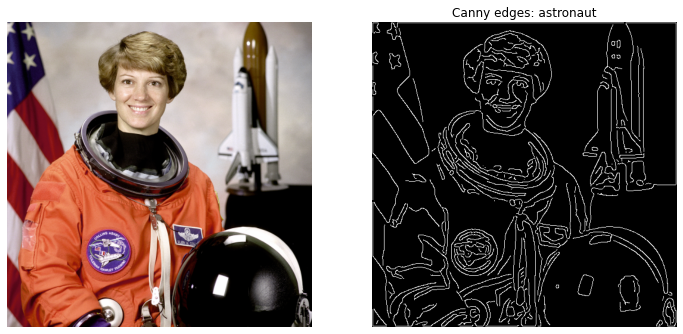

In [115]:
# Write your code here.
astro = skdata.astronaut()
astro_grey = skcolor.rgb2gray(astro) 

edges_A = skfeat.canny(
    astro_grey,
    sigma=2.0,
    low_threshold=0.2,
    high_threshold=0.77,
    use_quantiles=True
)

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(astro)
ax[1].imshow(edges_A, cmap='gray')
plt.title("Canny edges: astronaut")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# Step 2: Justify your parameter selection

1. Explain why you selected the parameters that you did and justify why they are appropriate for the given edge detection task and context.

    * The given parameters preserved the edges of important details like the ship in the background, the stars on the flag, and her eyes/smile/hairline, while limitting the amount of unneccessary details like lines in the suit from rumpled fabric. I think if I was trying a more thorough approach I would try to do some sort of blurring for just the colours orange and blonde so her hair and suit had less lines in them


# Step 3: Repeat for the `mushroom.jpg` image.

- load the image file `mushroom.jpg` provided with this assignment and convert it to grayscale
- perform Canny edge detection on the grayscale image -- select the parameters to find only the edges of the five mushrooms in the foreground that are in focus (you won't be able to do this perfectly, but do the best you can).
- display the result of the Canny edge detection as a binary image.

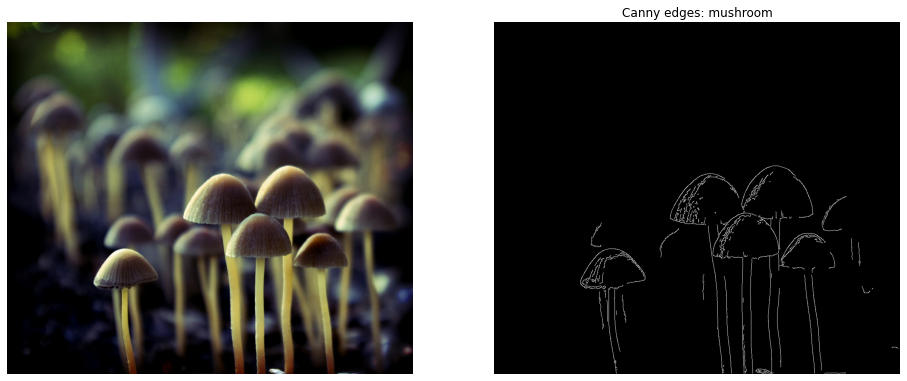

In [114]:
# Since this image is a little larger, it may display with a fuzzy appearance if you don't increase the 
# resolution of figure rendering a bit.  Before you call plt.imshow(), call plt.figure(dpi=300).  
# This will result in a clearer display of the binary edge image.

from skimage.io import imread

# Write your code here.
mush = imread("mushroom.jpg")
mush_grey = skcolor.rgb2gray(mush) 

edges_M = skfeat.canny(
    mush_grey,
    sigma=0.5,
    low_threshold=0.96,
    high_threshold=.98,
    use_quantiles=True
)

fig, ax = plt.subplots(1,2, figsize=(16,10))
ax[0].imshow(mush)
ax[1].imshow(edges_M, cmap='gray')
plt.title("Canny edges: mushroom")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# Step 4: Justify your parameter selection

1. Explain why you selected the parameters that you did and justify why they are appropriate for the given edge detection task and context.

    * Since the lines we care about are sharply in focus, we need to threshold on the high end to remove soft edges like those in the background. We also don't really need to blur the image at all since all the lines we care about are already very distinct from the lines we don't. I chose to keep my sigma very low so you could see the grain of the mushrooms a bit, at the cost of a few lines that aren't technically part of the foreground. If I wanted to remove them I would just need to increase my sigma until they disappeared, but this would also cause the fine details in the mushroom heads to disappear. 

